
# Credit Risk Predict Classification
"Credit Risk Predict Classification" adalah istilah yang mengacu pada proses membangun model klasifikasi untuk memprediksi risiko kredit. Dalam konteks ini, tujuannya adalah untuk menilai sejauh mana seorang peminjam dapat dianggap berisiko gagal membayar pinjamannya (risiko kredit) atau tidak. Model klasifikasi ini biasanya menggunakan berbagai fitur atau variabel yang dapat mempengaruhi kelayakan peminjam, seperti usia, pendapatan, lama bekerja, dan sebagainya.

## Data Understanding


- person_age: Usia individu.
- person_income: Pendapatan tahunan individu.
- person_home_ownership: Status kepemilikan rumah (milik sendiri, sewa, dll.).
- person_emp_length: Lama bekerja individu (dalam tahun).
- loan_intent: Tujuan penggunaan pinjaman.
- loan_grade: Grade atau tingkat kredit pinjaman.
- loan_amnt: Jumlah pinjaman.
- loan_int_rate: Tingkat bunga pinjaman.
- loan_status: Status pinjaman (0 menunjukkan tidak gagal bayar, 1 menunjukkan - gagal bayar).
- loan_percent_income: Persentase pendapatan yang digunakan untuk membayar - pinjaman.
- cb_person_default_on_file: Riwayat gagal bayar pada file pelanggan.
- cb_preson_cred_hist_length: Panjang historis kredit pelanggan.

<hr/>

- [Dataset](https://www.kaggle.com/datasets/laotse/credit-risk-dataset)

## Daftar Pustaka

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

## Load Dataset

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/wildanmjjhd29/Credit-Risk-Predict-Classification/main/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Data Preparation

In [25]:
baskom = df.shape
print('Jumlah Baris Dataset : ',baskom[0])
print('Jumlah Kolom Dataset : ',baskom[1])

Jumlah Baris Dataset :  32581
Jumlah Kolom Dataset :  12


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [27]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [28]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [29]:
df = df.dropna()

In [30]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [31]:
umur_error = df[df['person_age'] > 100].index
umur_error

Int64Index([81, 183, 575, 32297], dtype='int64')

In [32]:
df = df.drop(umur_error)

In [33]:
baskom = df.shape
print('Jumlah Baris Dataset : ',baskom[0])
print('Jumlah Kolom Dataset : ',baskom[1])

Jumlah Baris Dataset :  28634
Jumlah Kolom Dataset :  12


In [40]:
loan_grade = df['loan_grade'].value_counts()
loan_grade

A    9402
B    9149
C    5697
D    3248
E     870
F     209
G      59
Name: loan_grade, dtype: int64

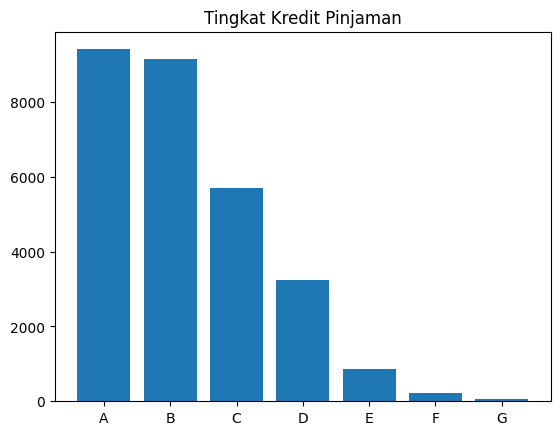

In [49]:
plt.bar(x = loan_grade.index, height = loan_grade.values)
plt.title('Tingkat Kredit Pinjaman')
plt.show()

In [41]:
age = df['person_age'].value_counts()
age.head()

23    3413
22    3163
24    3130
25    2700
26    2201
Name: person_age, dtype: int64

In [50]:
home = df['person_home_ownership'].value_counts()
home

RENT        14549
MORTGAGE    11799
OWN          2192
OTHER          94
Name: person_home_ownership, dtype: int64

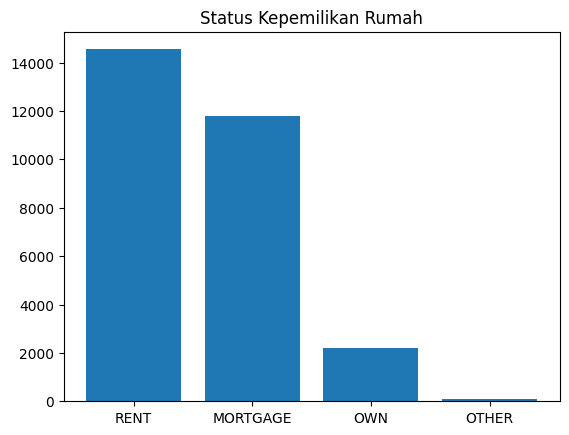

In [56]:
plt.bar(x=home.index, height=home.values)
plt.title('Status Kepemilikan Rumah')
plt.show()

In [ ]:
df = pd.concat([df,pd.get_dummies(df['person_home_ownership'])],axis=1)
df = df.drop(columns=['person_home_ownership'], axis=1)

In [65]:
df = pd.concat([df,pd.get_dummies(df['loan_intent'])],axis=1)
df = df.drop(columns=['loan_intent'],axis=1)

In [67]:
grade_mapping = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7
}

df['loan_grade'] = df['loan_grade'].map(grade_mapping)

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22,59000,123.0,4,35000,16.02,1,0.59,Y,3,...,0,0,1,0,0,0,0,0,1,0
1,21,9600,5.0,2,1000,11.14,0,0.10,N,2,...,0,0,0,0,0,1,0,0,0,0
2,25,9600,1.0,3,5500,12.87,1,0.57,N,3,...,0,1,0,0,0,0,0,1,0,0
3,23,65500,4.0,3,35000,15.23,1,0.53,N,2,...,0,1,0,0,0,0,0,1,0,0
4,24,54400,8.0,3,35000,14.27,1,0.55,Y,4,...,0,1,0,0,0,0,0,1,0,0


In [68]:
riwayat_gagal_mapping = {'Y': 1, 'N':0}
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map(riwayat_gagal_mapping)

In [70]:
# Data Preparation
baskom = df.shape
print('Jumlah Baris Dataset : ',baskom[0])
print('Jumlah Kolom Dataset : ',baskom[1])

Jumlah Baris Dataset :  28634
Jumlah Kolom Dataset :  26


In [71]:
# membagi dataset
x = df.drop(columns=['loan_status'],axis=1)
y = df['loan_status']

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [77]:
x_train.shape

(22907, 25)

In [78]:
x_test.shape

(5727, 25)

## Modeling

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_predictions = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors Accuracy: {:.2%}".format(knn_accuracy))

K-Nearest Neighbors Accuracy: 84.27%


In [80]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(x_train, y_train)
tree_predictions = tree.predict(x_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
print("Decision Tree Accuracy : {:.2%}:".format(tree_accuracy))

Decision Tree Accuracy : 89.99%:


In [81]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=1)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy: {:.2%}:".format(rf_accuracy))

Random Forest Accuracy: 93.78%:


In [82]:
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale')
svm_model.fit(x_train, y_train)
svm_predictions = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_predictions)
print("SVM Acuuracy : {:.2%}:".format(svm_accuracy))

SVM Acuuracy : 80.86%:


In [83]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train, y_train)
bayes_predictions = naive_bayes_model.predict(x_test)
bayes_accuracy = accuracy_score(y_test,bayes_predictions)
print("Naive Bayes Accuracy : {:.2%}:".format(bayes_accuracy))

Naive Bayes Accuracy : 82.84%:


## Test Model

In [124]:
# Membuat array untuk data test
data_test = np.array([[20, 15000, 5, 3, 15000, 10.5, 0.25, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]])
kolom = x_test.columns
data_test = pd.DataFrame(data_test,columns=kolom)
data_test

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,...,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,20.0,15000.0,5.0,3.0,15000.0,10.5,0.25,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [126]:
predict = rf_model.predict(data_test)
if predict[0] == 1:
  print('Berisiko Gagal Bayar')
else:
  print('Sukses Bayar')

Berisiko Gagal Bayar
